# CO2 Emission Prediction Model
## In this model we have to estimate the co2 emission of the newely manufactured Cars

### To reduce the effect of Global Warming caused mainly due to CO2 cars manufacturing companies are pre-estimating the CO2 emissions for a newly manufactured car that is about to launch in near future based on the features of car.

This project deals with estimating the CO2 Emissions for a newly manufactured car by making a Regression models which can accurately predetermine the car CO2 emissions before it is being launched.

In [1]:
'''
Now to make the prediction we have to use some of the essential libraries to make the prediction
'''
import pandas as pd # for dealing with the structured Data
import numpy as np # for dealing with the numerical Computation
from sklearn import linear_model, metrics # Machine Learning Library
import matplotlib.pyplot as plt # Data Visualisation Library
import seaborn as sns # advance visualisation library

## Task 1
### Import the Dataset 

In [2]:
Emission = pd.read_csv('CO2 emission.csv')
Emission.head() # Displaying The First 5 values of the dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## The Data given here is for Year 2014 manufactured Cars.
### Explanation of the Dataset Column
    YEAR – Year of manufacturing of car.

    MAKE – Manufacturing company name.

    VEHICLECLASS – Type of vehicle like SUV or medium sized etc.

    ENGINESIZE – Size of the car’s engine (expressed in cc or cubic centimetre).

    CYLINDERS – Number of Cylinders in the engine.

    TRANSMISSION – Automatic or manual transmission with number of gears.

    FUELTYPE – It indicates the type of fuel car use i.e. Diesel, Petrol, Z (Unleaded Petrol) etc.

    FUELCONSUMPTION_CITY – Fuel consumption or Fuel economy of car while running in city expressed in miles per gallon.

    FUELCONSUMPTION_HWY - Fuel Consumption or Fuel economy of car on highway expressed in miles per gallon.

    FUELCONSUMPTION_COMB – Net or combination of Fuel Economy expressed in miles per gallon.

    FUELCONSUMPTION_COMB_MPG – Total fuel economy expressed in miles per gallon.

    CO2EMISSIONS – The CO2 emitted by the car expressed in grams.



## Task 2
### Analysing and cleaning the Data
a) Analyse the shape of the Data using emission dataframe variable. Check the no. of rows and Columns available.

b) Print the top 5 rows and check the values.

c) Pick out four columns from the above dataframe which contributes towards CO2 emissions for a car and rename it as emission_new.

In [3]:
# Now checking is their any colummn containing null values
Emission.isnull().sum()


MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [4]:
Emission.shape

(1067, 13)

### we found that the Dataset contain the 1067 rows and 13 Colummns

## Now finding the Relevant Colummn that greater influence on the CO2 Emissions

In [22]:
Emission_new=Emission[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
Emission_new.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## Explanation of picking these colummn only
    1.EngineSize- the size of the engine has a great impact on the co2 emission as bigger the engine size bigger the
    cO2emission 
    2.Cylinders- The more the cylinders in the engine the more the fuel consumption and hence the more co2 emission
    3.fuelconsuption - the more fuel consumption means the more co2 emission and lesser will be the average given by the car
    4.co2 emissions- the co2 emission colummn tells that the present car co2 emission rate

## Task 3 - Perform explanatory analysis
a) Check the basic statistics of the given new dataset columns. Describe the Dataset in your words including the columns, their type, ranges and other stats. Statistics should include the mean, median, standard deviation, different quartiles, minimum and maximum values of each column.

b) Check the units of all the columns.

In [6]:
#  a) describing the dataset ie mean count standard deviation min and much more
Emission_new.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


In [5]:
#  b) now checking the type of the colummn
Emission.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

## Task 4 - Visualizing the Data

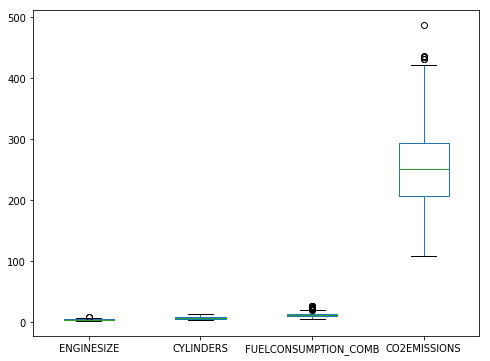

In [7]:
Emission_new.head()
# plotting the boxplot of the new dataframe 
Emission_new.plot(kind='box',figsize=(8,6))# the boxplot show the quartiles, mean,median min and max range
plt.show()

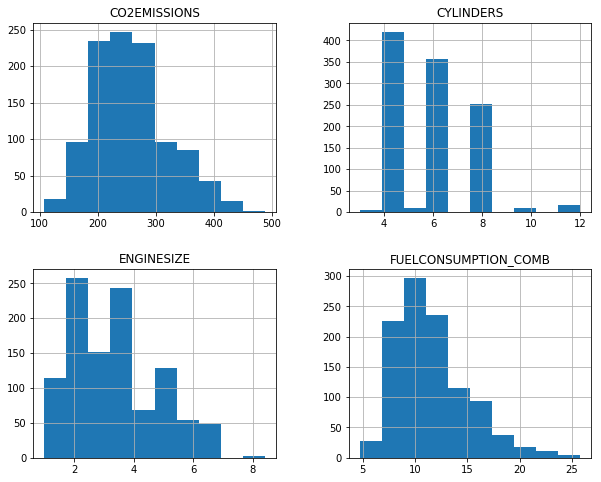

In [26]:
Emission_new.hist(figsize=(10,8))# plotting the histogram of the new dataframe emission_new
plt.show()

## Now Finding the correlation between the colummn of the new Dataframe Emission_new

In [10]:
Emission_new.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


Now from the above relation we can say that CO2 emission is the dependent variable and the other three are the independent variable now we further explore by plotting the heatmap of this Dataframe

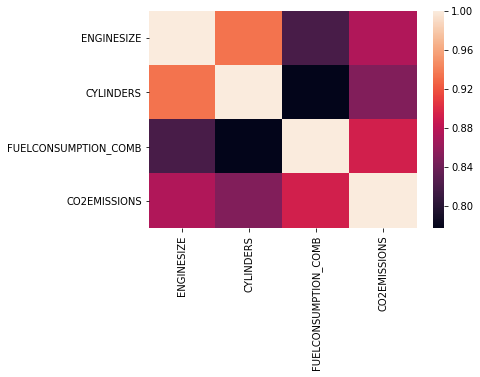

In [13]:
# Plotting the correlation throught the heatmap.
sns.heatmap(Emission_new.corr()) # the heatmap shows the correlation btween the rows and colummn using different colors
plt.show()

## Plotting the Scatter plot between the Above Colummn
    The first plot should be between ENGINESIZE and CO2EMISSIONS.
    The second plot should be between CYLINDERS and CO2EMISSIONS.
    The third plot should be between FUELCONSUMPTION_COMB and CO2EMISSIONS.

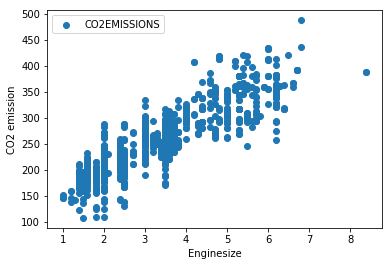

In [75]:
# PLot 1
'''
In this plot we can observe that there are continious value in the graph so this can be considered in regression
'''
x=Emission_new['ENGINESIZE']
y=Emission_new['CO2EMISSIONS']
plt.scatter(x,y)
plt.legend()
plt.xlabel('Enginesize')
plt.ylabel('CO2 emission')
plt.show()

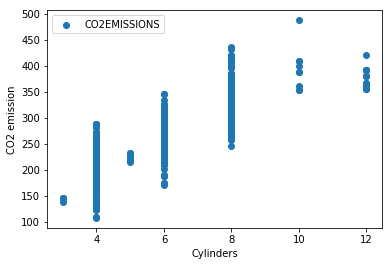

In [76]:
# Plot 2
'''
The cylinders value cannot be considered as by seeing the graph we can observe that there are not continious values. the discrete 
values are there .
'''
x1=Emission_new['CYLINDERS']
plt.scatter(x1,y)
plt.xlabel('Cylinders')
plt.ylabel('CO2 emission')
plt.legend()
plt.show()

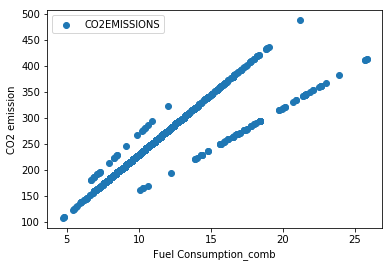

In [77]:
# Plot 3
'''
    these values can be considered for the regression 
'''
x1=Emission_new['FUELCONSUMPTION_COMB']
plt.scatter(x1,y)
plt.xlabel('Fuel Consumption_comb')
plt.ylabel('CO2 emission')
plt.legend()
plt.show()

## So the independent Variable are cylinders, EngineSize and Fuel Consumption_MPG

## Plotting the lmplot
    FUELCONSUMPTION_COMB are the two independent variables so plot an lmplot between

    ENGINESIZE and CO2EMISSIONS
    FUELCONSUMPTION_COMB and CO2EMISSIONS

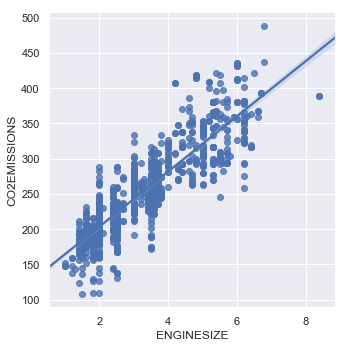

In [19]:
# Lmplot between WngineSize and cO2 Emissions
sns.set(color_codes=True)
sns.lmplot(x="ENGINESIZE", y="CO2EMISSIONS", data=Emission_new)
plt.show()

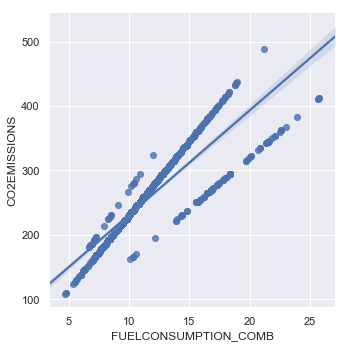

In [20]:
# Lmplot between Fuelconsumption_comb and co2 Emissions
sns.set(color_codes=True)
sns.lmplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=Emission_new)
plt.show()

# Task 5 – Linear Regression using Train and Test data

1. Now we have Done Loading the Dataset.
2. Analysing the data by checking the shape and properties(mean .std,25%,75% median)
3. We have performed the exploratory analysis
4. We have chosen our independent and dependent variable and we have visualise the data by using the different plotting technique

### Now Our Main task is to predict the values for upcoming cars of their co2 emission so we perform the linear regression on the new Dataframe Emission_new in which co2 emissions is the dependent variable and other are independent variable

In [8]:
# Now dividing the dataset into two parts called train set and test set
# The train set contains the values on which our model is trained 
# the test set contains the values in which the model works
X=Emission_new[['ENGINESIZE']] # set of independent variable 
Y=Emission_new[['CO2EMISSIONS']] # set of dependent variable

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
'''
We have perform split on our dataset 80% is training and 20 % is test set 
then we have created the linear model using the linearRegression 
'''
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
l_model = linear_model.LinearRegression()

In [11]:
# we have passed the training dataset into the model
l_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# checking the score of the model we can say from below that it is fair enough not very good
l_model.score(X_train,Y_train)

0.7644042001810549

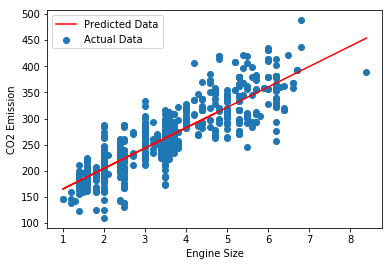

In [30]:
'''b) Plot two plots into a same graph
    The first plot should be scatter plot between train data ENGINESIZE column and train data CO2EMISSION column.
    The second plot should be a regression line.
'''
plt.scatter(X_train,Y_train,label='Actual Data')
plt.plot(X_test,l_model.predict(X_test),'r',label='Predicted Data')
plt.legend()
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

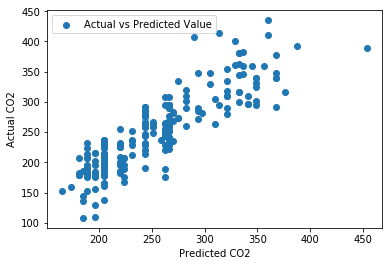

In [49]:
#Plot a scatter plot between actual value of CO2EMISSIONS and predicted value of CO2EMISSIONS.
predicted_co2 = [[l_model.predict(X_test)]]
plt.scatter(predicted_co2,Y_test,label='Actual vs Predicted Value')
plt.xlabel('Predicted CO2')
plt.ylabel('Actual CO2')
plt.legend()
plt.show()

In [52]:
# Calculating the mean squared error
metrics.mean_squared_error(Y_test,l_model.predict(X_test))

985.9381692274995

In [80]:
metrics.r2_score(Y_test,l_model.predict(X_test))

0.7615595731934374

## The mean squared error in linear regression is 985.93
## The R score of the linear regression is 0.76155

# Task-5
   ## Multiple Regression
        a) Use emission_new Pandas dataframe to split data into training dataset and test dataset and perform multivariate Regression keeping all the parameters as decided above.

In [53]:
# taking the enginesize anf fuelconsumption_comb as independent variable and co2 emission as dependent variable
x=Emission_new[['ENGINESIZE','FUELCONSUMPTION_COMB']]
y=Emission_new[['CO2EMISSIONS']]

In [54]:
x.head() #displaying the first 5 values of data

,ENGINESIZE,FUELCONSUMPTION_COMB
0,2.0,8.5
1,2.4,9.6
2,1.5,5.9
3,3.5,11.1
4,3.5,10.6


In [55]:
'''
We are splitting our x any y data into training and test set 
from training data our model will learn and from test data our model will predict the outcome 
so we splitted the data into 80 20 ratio 80 is training set and 20 is test set
'''
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=19)

In [56]:
# Creating a model
multi_model = linear_model.LinearRegression()

In [60]:
# fitting our data into the model that we have created above
multi_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
#checking the score of the model
multi_model.score(x_train,y_train)

0.8545301566215628

## from the above score we can say that our model has been improved from the above model

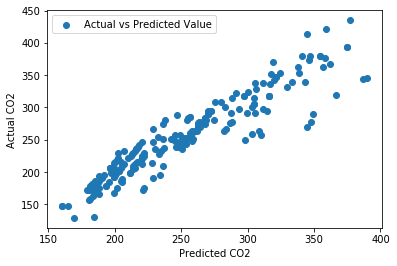

In [65]:
#b) Plot a scatter plot between actual value of CO2EMISSIONS and predicted value of CO2EMISSIONS.
predicted_co2 = [[multi_model.predict(x_test)]]
plt.scatter(predicted_co2,y_test,label='Actual vs Predicted Value')
plt.xlabel('Predicted CO2')
plt.ylabel('Actual CO2')
plt.legend()
plt.show()

In [74]:
metrics.mean_squared_error(y_test,multi_model.predict(x_test))

503.26037277464496

In [79]:
metrics.r2_score(y_test,multi_model.predict(x_test))

0.8712597343372042

## The mean squared error of the multi variate model is 503.260
## The R score of the model is 0.8712

# Explain which model is suitable i.e. Linear Regression using Train and Test data or Multivariate Prediction Model using Train and Test data using mean square value and R-value of regression.


## The Multivariate Model is preferred over the linear model
    The mean squared error tells you how close a regression line is to a set of points.It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
        SO in linear model the error is about 985 so it signifies that the regression line is not closer to set of points whereas in the case of multi Variate Model the mean square error is around 503 so the line is close to the set of points compared to the linear model
        R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
        R-squared is always between 0 and 100%:

    0% indicates that the model explains none of the variability of the response data around its mean.
    100% indicates that the model explains all the variability of the response data around its mean.
    In Case of Linear Model the r score is 0.75 and in multi variate it is 0.87 so the Multi Variate is Preferred
    